# Import Data

In [62]:
#Import Files
from google.colab import files
uploaded = files.upload()

Saving Test_data.csv to Test_data (1).csv
Saving Train_data.csv to Train_data (1).csv


In [3]:
import pandas as pd
import numpy as np
column_names = ['Age', 'Workclass', 'fnlwgt', 'Education', 'EducationNum', 'Marital-Status', 'Occupation', 'Relatinship', 'Race', 'Sex', 'Captial_gain', 'Captial-loss', 'Hours-per-week', 'Native-country', 'Income']
df_test = pd.read_csv('Test_data.csv', names = column_names)
df_train = pd.read_csv('Train_data.csv', names = column_names)


In [4]:
df_train

,Age,Workclass,fnlwgt,Education,EducationNum,Marital-Status,Occupation,Relatinship,Race,Sex,Captial_gain,Captial-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22740,25,Private,240081,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,<=50K
22741,22,Private,147655,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
22742,26,Private,90277,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,?,<=50K
22743,49,Private,60751,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K


In [5]:
df_test

,Age,Workclass,fnlwgt,Education,EducationNum,Marital-Status,Occupation,Relatinship,Race,Sex,Captial_gain,Captial-loss,Hours-per-week,Native-country,Income
0,37,Self-emp-not-inc,154641,Assoc-acdm,12,Married-civ-spouse,Farming-fishing,Husband,White,Male,2105,0,50,United-States,<=50K
1,39,Private,491000,Bachelors,13,Never-married,Exec-managerial,Other-relative,Black,Male,0,0,45,United-States,<=50K
2,33,Private,399088,HS-grad,9,Divorced,Transport-moving,Unmarried,White,Female,0,0,40,United-States,<=50K
3,41,Self-emp-not-inc,186909,Masters,14,Married-civ-spouse,Sales,Wife,White,Female,0,1902,35,United-States,>50K
4,65,Private,105491,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9811,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
9812,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
9813,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
9814,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Preprocessing 

In [6]:
df_train.dropna(axis = 0, how = "any")
print(df_train.shape)
df_test.dropna(axis = 0, how = "any")
print(df_test.shape)

(22745, 15)
(9816, 15)


  By check datasets , we find that the missing values are not nan but actually ' ?'. We check by it column by column.

In [7]:
for col in column_names:
  print(col + ' train',len(df_train[df_train[col] == ' ?']))
  print(col + ' test ', len(df_test[df_test[col] == ' ?']))

Age train 0
Age test  0
Workclass train 1272
Workclass test  564
fnlwgt train 0
fnlwgt test  0
Education train 0
Education test  0
EducationNum train 0
EducationNum test  0
Marital-Status train 0
Marital-Status test  0
Occupation train 1276
Occupation test  567
Relatinship train 0
Relatinship test  0
Race train 0
Race test  0
Sex train 0
Sex test  0
Captial_gain train 0
Captial_gain test  0
Captial-loss train 0
Captial-loss test  0
Hours-per-week train 0
Hours-per-week test  0
Native-country train 406
Native-country test  177
Income train 0
Income test  0


Only three columns have missing values: "Workclass", "Occupation", "Native-country". They are all category values. Replace category values are  complicated and hard to handle. We prefer to drop them as they are minorities.

In [8]:
missings = [ 'Workclass' ,'Occupation', 'Native-country']
for miss in missings:
  df_train.drop(df_train[df_train[miss] == ' ?'].index, inplace=True)
  print(miss + ' train' ,df_train.shape)
  df_test.drop(df_test[df_test[miss] == ' ?'].index, inplace =True)
  print(miss + ' test', df_test.shape)



Workclass train (21473, 15)
Workclass test (9252, 15)
Occupation train (21469, 15)
Occupation test (9249, 15)
Native-country train (21081, 15)
Native-country test (9081, 15)


We have aroun 1000 rows removed fron trains and around 800 rows from test.

In [9]:
Categories = ['Workclass', 'Education', 'Marital-Status', 'Occupation', 'Relatinship', 'Race', 'Sex', 'Native-country', 'Income']
Numerics =  ['Age', 'fnlwgt',  'EducationNum', 'Captial_gain', 'Captial-loss', 'Hours-per-week', ]

for num in Numerics:
  print("The unusual values  in training set " + num + ':',df_train[ df_train[num] < 0 ])
  print("The unusual values  in test set " + num + ':',df_test[ df_test[num] < 0 ])


The unusual values  in training set Age: Empty DataFrame
Columns: [Age, Workclass, fnlwgt, Education, EducationNum, Marital-Status, Occupation, Relatinship, Race, Sex, Captial_gain, Captial-loss, Hours-per-week, Native-country, Income]
Index: []
The unusual values  in test set Age: Empty DataFrame
Columns: [Age, Workclass, fnlwgt, Education, EducationNum, Marital-Status, Occupation, Relatinship, Race, Sex, Captial_gain, Captial-loss, Hours-per-week, Native-country, Income]
Index: []
The unusual values  in training set fnlwgt: Empty DataFrame
Columns: [Age, Workclass, fnlwgt, Education, EducationNum, Marital-Status, Occupation, Relatinship, Race, Sex, Captial_gain, Captial-loss, Hours-per-week, Native-country, Income]
Index: []
The unusual values  in test set fnlwgt: Empty DataFrame
Columns: [Age, Workclass, fnlwgt, Education, EducationNum, Marital-Status, Occupation, Relatinship, Race, Sex, Captial_gain, Captial-loss, Hours-per-week, Native-country, Income]
Index: []
The unusual values

In [10]:
df_train.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
EducationNum       int64
Marital-Status    object
Occupation        object
Relatinship       object
Race              object
Sex               object
Captial_gain       int64
Captial-loss       int64
Hours-per-week     int64
Native-country    object
Income            object
dtype: object

Type is fine. Numeric values are int64 and category values are object.  We may encode category into int before build model if it is needed

In [11]:


df_train.insert(11, 'Captial_profit', (df_train['Captial_gain'] - df_train['Captial-loss']) )
df_test.insert(11, 'Captial_profit', (df_test['Captial_gain'] - df_test['Captial-loss']) )
df_train = df_train.drop(['Captial_gain','Captial-loss'] ,axis = 1 )
df_test = df_test.drop(['Captial_gain','Captial-loss'] ,axis = 1 )

we find that it is not necessary to have 'Captial_gain' and 'Captial-loss' as two columns, it is possible to minus the loss from gain to get real profit.

In [12]:
df_train = df_train.drop(['Education', 'Relatinship'] ,axis = 1 )
df_test = df_test.drop(['Education', 'Relatinship'] ,axis = 1 )

We find that that 'Education' has one to one relationship with 'EducationNum'.
The higher the degree the higher the EducationNum. Thus we can remove one of them as they have highlly correlated relationship. We choose to remove 'Education" as it is category. We find that Martial-Status and 'Relationship' delievery similar information. Many words give overlapped information which are not helpful(such as 'Divorced' -- 'Unmarried',  'Married-civ-spouse' ---- 'Husband' or 'Wife') We remove one of them to get rid of  huge load of redundant information , we choose to remove 'Relationship'

In [13]:
df_train.describe()

,Age,fnlwgt,EducationNum,Captial_profit,Hours-per-week
count,21081.000000,2.108100e+04,21081.000000,21081.000000,21081.000000
mean,38.465063,1.897247e+05,10.123334,975.601205,40.905507
std,13.167982,1.051409e+05,2.531072,7315.044465,11.917083
min,17.000000,1.921400e+04,1.000000,-4356.000000,1.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,40.000000
50%,37.000000,1.785370e+05,10.000000,0.000000,40.000000
75%,47.000000,2.374520e+05,13.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,99.000000


Simple summary of data

# EDA

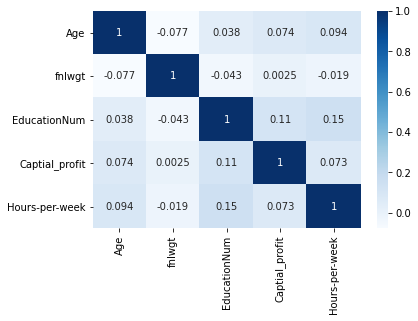

In [74]:
import seaborn as sns
sns.heatmap(df_train.corr(), annot=True, cmap="Blues")

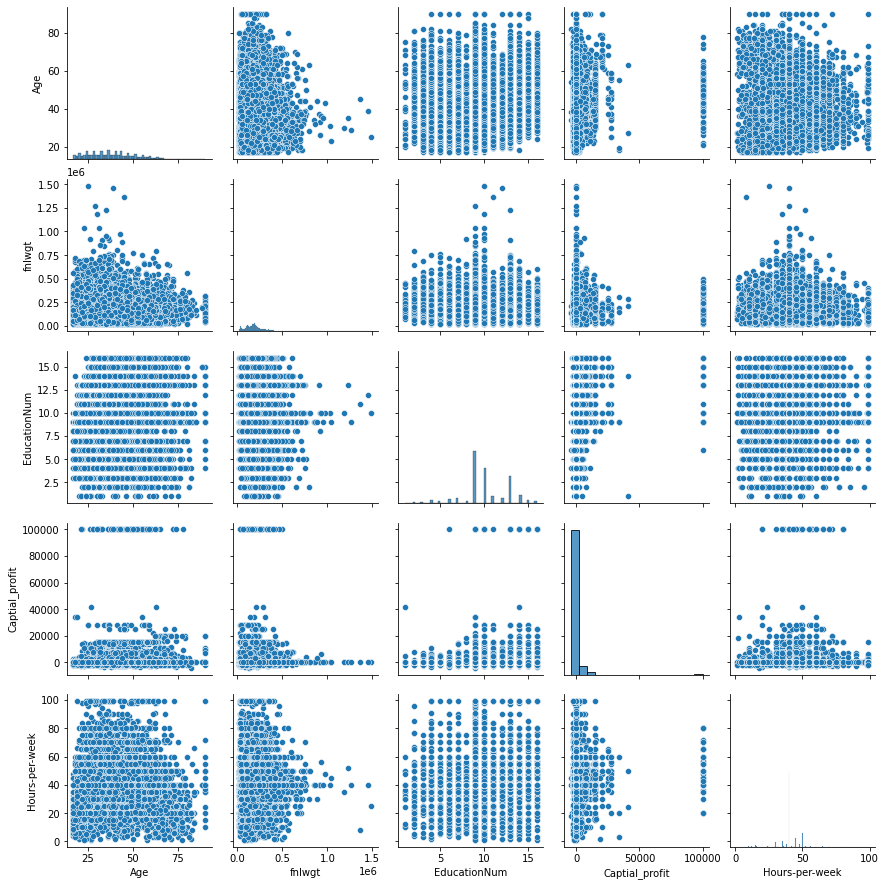

In [75]:
sns.pairplot(df_train)

There is little relationship between  continuous variables

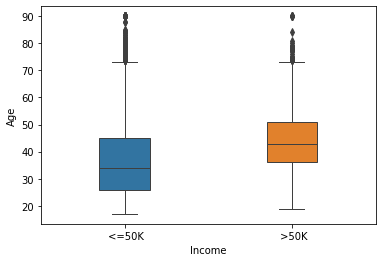

In [76]:
sns.boxplot(x = 'Income', y='Age' ,data=df_train , width = 0.3, linewidth = 1)

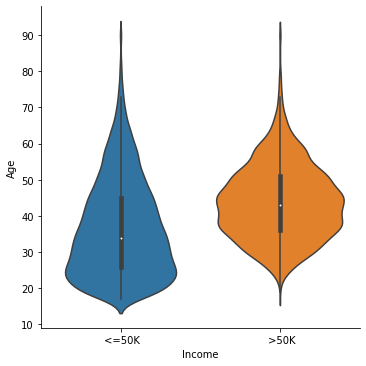

In [77]:
sns.catplot(x = 'Income', y='Age', data=df_train , kind="violin")

The age has quite good distribution and not much outliers.

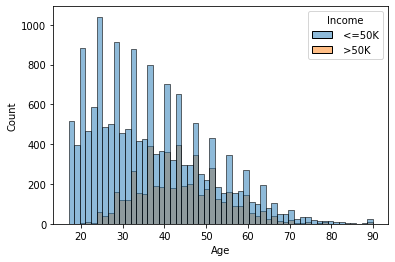

In [78]:
sns.histplot(df_train, x='Age', hue = "Income", )


We find that there are more younger age samples, there are much fewer people with income greather than 50k. People with age around 40 are more likelly to have income greater than 50k.

In [79]:
import matplotlib.pyplot as plt


We find that Male have more Capital_profit than Female

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

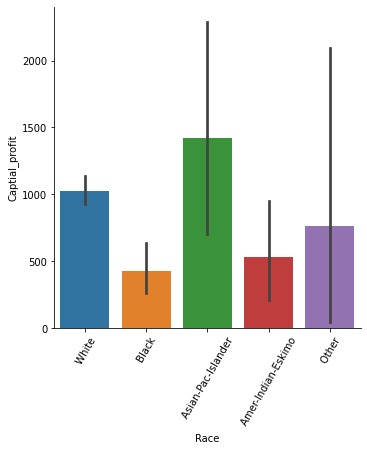

In [80]:
sns.catplot( x='Race',y='Captial_profit' ,kind="bar", data=df_train)
plt.xticks(rotation=60)

Asian has highest capital profit, then white

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4b35052d0>,
      dtype=object)

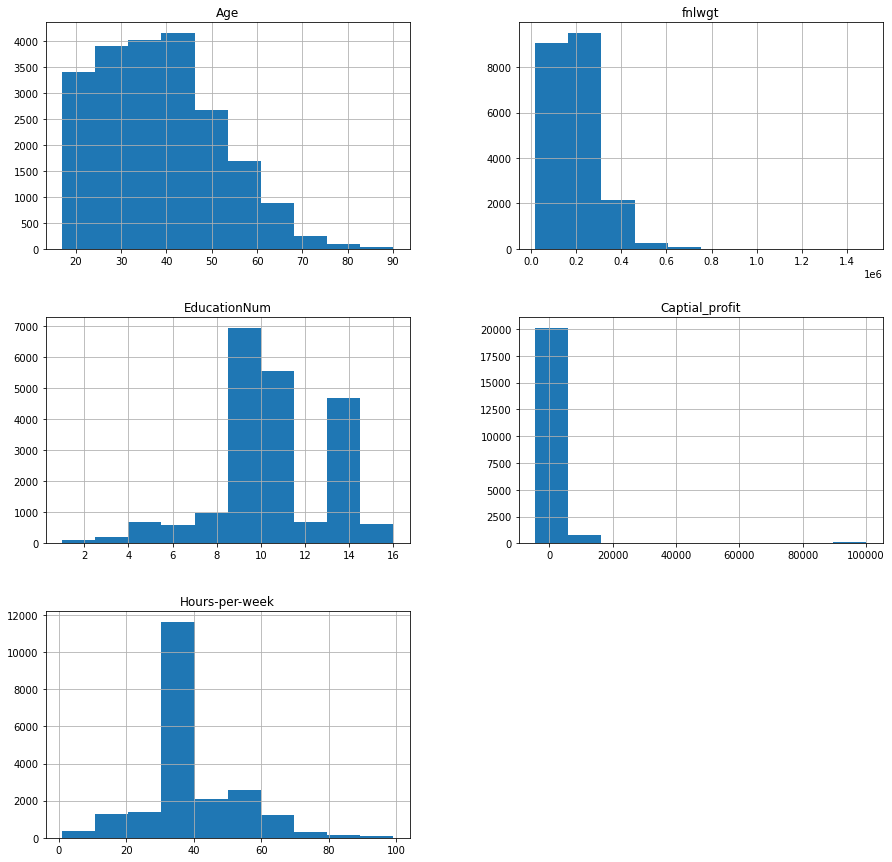

In [81]:
df_train.hist(figsize=(15,15))

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

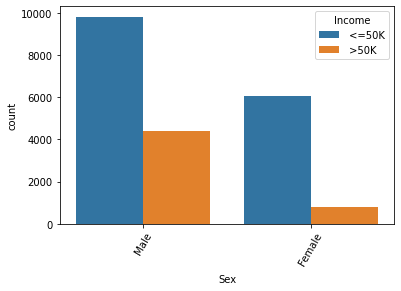

In [82]:
sns.countplot( x='Sex',hue = 'Income' , data=df_train)
plt.xticks(rotation=60)

Male is more likelly to have >50k thaan female

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

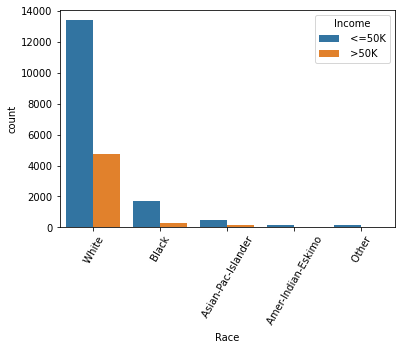

In [83]:
sns.countplot( x='Race',hue = 'Income' , data=df_train)
plt.xticks(rotation=60)

From the column 'Race' the sample is imbalanced. There are too many people with white race but few other samples. We may consider resample if we consider race is an important factor

Overall distribution of each one, each one is not normal distributed

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

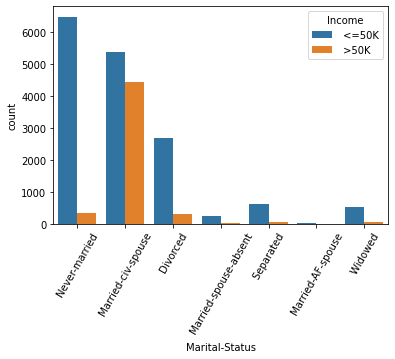

In [84]:
sns.countplot( x='Marital-Status',hue = 'Income' , data=df_train)
plt.xticks(rotation=60)

Married-civ-spouse is more likelly have income > 50k from the graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

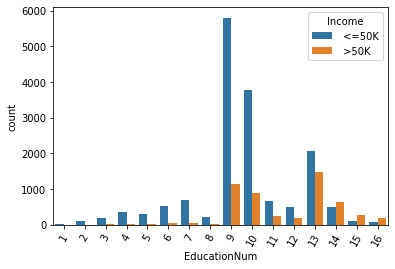

In [85]:
sns.countplot( x='EducationNum',hue = 'Income' , data=df_train)
plt.xticks(rotation=60)

Most people' education are in the middle. With educationNum < 9 ， it is not lilelly to have >50k income

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

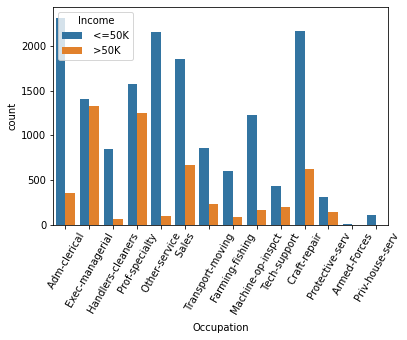

In [86]:
sns.countplot( x='Occupation',hue = 'Income' , data=df_train)
plt.xticks(rotation=60)

Some occupations are more likelly to have >50k income

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

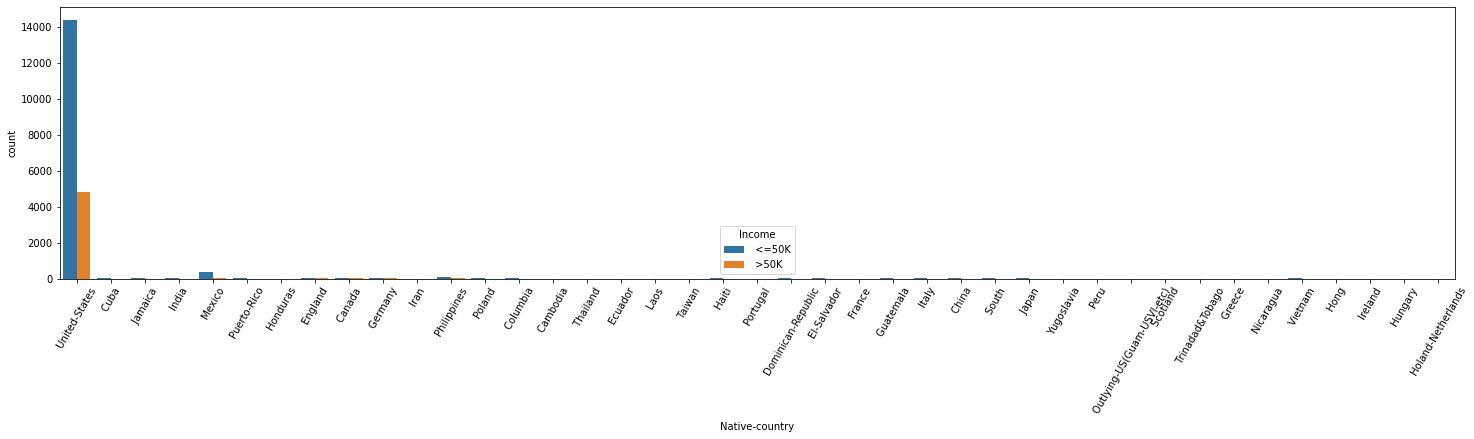

In [87]:
plt.figure(figsize=(25,5))
sns.countplot( x='Native-country',hue = 'Income' , data=df_train)
plt.xticks(rotation=60)

Most data are from US, the data is imbalanced in terms of nationality. The data from other country are not helpful.  We may consider resample or not use this column if necessary.

# Model Preprocessing

In [14]:
column_names = ['Age', 'Workclass', 'fnlwgt',  'EducationNum', 'Marital-Status', 'Occupation',  'Race', 'Sex', 'Captial_profit' ,'Hours-per-week', 'Native-country' ,'Income']
category_names = ['Workclass', 'Marital-Status', 'Occupation',  'Race', 'Sex', 'Native-country' ,'Income']
numeric_names = ['Age',  'fnlwgt',  'EducationNum', 'Captial_profit' ,'Hours-per-week']

In [15]:
#Encode category intn int

from sklearn.preprocessing import LabelEncoder

def decode(train, test, cols):
    for col in cols:
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] = LabelEncoder().fit_transform(test[col])
    return train,test    

In [16]:
train, test =  decode(df_train, df_test, column_names)


In [17]:
df_train

,Age,Workclass,fnlwgt,EducationNum,Marital-Status,Occupation,Race,Sex,Captial_profit,Hours-per-week,Native-country,Income
0,22,5,1867,12,4,0,4,1,105,39,38,0
1,33,4,2048,12,2,3,4,1,84,12,38,0
2,21,2,10204,8,0,5,4,1,84,39,38,0
3,36,2,11089,6,2,5,2,1,84,39,38,0
4,11,2,13922,12,2,9,2,0,84,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22739,10,2,6739,12,2,3,4,1,84,39,38,0
22740,8,2,11316,8,4,11,2,1,84,39,38,0
22741,5,2,5433,9,4,0,4,0,84,39,38,0
22743,32,2,1433,8,2,10,4,1,84,39,38,0


We encode category into int if necessary.

In [18]:
features = df_train.iloc[:,0:11]
X_test = df_test.iloc[:,0:11]

In [19]:
target = df_train.iloc[:,11]
Y_test = df_test.iloc[:,11]

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.20,random_state = 9)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25,random_state = 9)

We split data sets into 0.6 train set, 0.2 validation set, 0.2 test set

# Model 1 KNN:

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn.metrics import *


df_results = pd.DataFrame(columns = ['k','pipe','Accuracy', 'Sensitivity','Specificty' ,'F1 Score', 'Roc_Auc'])
count = 0
for i in range(1,21):
    pipe_kNN = Pipeline (steps = [ ('model',neighbors.KNeighborsClassifier(n_neighbors=i))])
    pipe_kNN_scaled = Pipeline (steps = [('Scaler', MinMaxScaler()), ('model',neighbors.KNeighborsClassifier(n_neighbors=i))])
    pipe_kNN_scaled_pca = Pipeline (steps = [('Scaler', MinMaxScaler()), ('pca',PCA(0.9)), ('model',neighbors.KNeighborsClassifier(n_neighbors=i))])
    pipe_list = [pipe_kNN, pipe_kNN_scaled, pipe_kNN_scaled_pca]
    pipe_num = 0 
    for pipe in pipe_list:
      model = pipe.fit(X_train, y_train) 
      y_pred = model.predict(X_val)
      tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
      accuracy = (tp+tn)/(tn+fp+fn+tp)
      sensitivity = (tp)/(fn+tp)
      specificty = (tn)/(fp+tn)
      f1 = f1_score(y_val, y_pred)
      auc = roc_auc_score(y_val, y_pred)
      df_results.loc[count] = [i ,pipe_num,accuracy,sensitivity,specificty,f1,auc]
      pipe_num = pipe_num + 1
      count = count + 1

     

print(df_results)

       k  pipe  Accuracy  Sensitivity  Specificty  F1 Score   Roc_Auc
0    1.0   0.0  0.715438     0.444765    0.804156  0.435560  0.624460
1    1.0   1.0  0.797486     0.594621    0.863980  0.591778  0.729300
2    1.0   2.0  0.776856     0.539866    0.854534  0.544310  0.697200
3    2.0   0.0  0.777093     0.259366    0.946788  0.364865  0.603077
4    2.0   1.0  0.815034     0.420749    0.944270  0.528986  0.682509
5    2.0   2.0  0.800095     0.364073    0.943010  0.473454  0.653542
6    3.0   0.0  0.754802     0.393852    0.873111  0.442287  0.633481
7    3.0   1.0  0.816931     0.599424    0.888224  0.617822  0.743824
8    3.0   2.0  0.797961     0.548511    0.879723  0.572718  0.714117
9    4.0   0.0  0.778990     0.259366    0.949307  0.366848  0.604337
10   4.0   1.0  0.820963     0.478386    0.933249  0.568818  0.705818
11   4.0   2.0  0.803889     0.424592    0.928212  0.516657  0.676402
12   5.0   0.0  0.767607     0.335255    0.909320  0.415971  0.622287
13   5.0   1.0  0.82

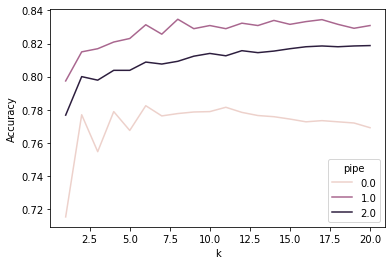

In [99]:
sns.lineplot(x = 'k', y = 'Accuracy',  hue = 'pipe', data = df_results )

Pipe 1 with k = 8 is the best model we find for KNN. Which is a minmax scaled KNN model with 8 neighbor with accuracy 0.834717
.

---



# Model 2 Naive Bayes

In [106]:
NB_X_train = X_train.copy()
NB_X_val = X_val.copy()
numeric_names = ['Age',  'fnlwgt',  'EducationNum', 'Captial_profit' ,'Hours-per-week']


NB_X_train = NB_X_train.assign(age_range =pd.cut(NB_X_train['Age'], 
                               bins=[-999, 20, 40,  60, 999], 
                               labels=['<=20', '21-40', '40-60', '60+']))

NB_X_train = NB_X_train.assign(education_level =pd.cut(NB_X_train['EducationNum'], 
                               bins=[-999, 8, 13,  999], 
                               labels=['<=8', '9-13', '13+']))

NB_X_train =NB_X_train.assign(profit_level =pd.cut(NB_X_train['Captial_profit'], 
                               bins=[-999999, 0,5000, 10000,  999999], 
                               labels=['<=0', '0-5000', '5000-10000','10000+']))

NB_X_train = NB_X_train.assign(work_hour_level =pd.cut(NB_X_train['Hours-per-week'], 
                               bins=[-999, 20, 40,  60, 999], 
                               labels=['0-20', '21-40', '41-60' ,'60+']))
NB_X_train = NB_X_train.drop(numeric_names, axis = 1 )

NB_X_val = NB_X_val.assign(age_range =pd.cut(NB_X_val['Age'], 
                               bins=[-999, 20, 40,  60, 999], 
                               labels=['<=20', '21-40', '40-60', '60+']))

NB_X_val = NB_X_val.assign(education_level =pd.cut(NB_X_val['EducationNum'], 
                               bins=[-999, 8, 13,  999], 
                               labels=['<=8', '9-13', '13+']))

NB_X_val =NB_X_val.assign(profit_level =pd.cut(NB_X_val['Captial_profit'], 
                               bins=[-999999, 0,5000, 10000,  999999], 
                               labels=['<=0', '0-5000', '5000-10000','10000+']))

NB_X_val = NB_X_val.assign(work_hour_level =pd.cut(NB_X_val['Hours-per-week'], 
                               bins=[-999, 20, 40,  60, 999], 
                               labels=['0-20', '21-40', '41-60' ,'60+']))
NB_X_val = NB_X_val.drop(numeric_names, axis = 1 )

In [107]:
NB_X_train.dtypes

Workclass             int64
Marital-Status        int64
Occupation            int64
Race                  int64
Sex                   int64
Native-country        int64
age_range          category
education_level    category
profit_level       category
work_hour_level    category
dtype: object

In [108]:
names = ['age_range', 'education_level','profit_level','work_hour_level' ]
def decode_new(train, test, cols):
    for col in cols:
        train[col] = train[col].cat.codes
        test[col] = test[col].cat.codes
    return train,test    
NB_X_train, NB_X_val =  decode_new(NB_X_train, NB_X_val, names)

For NB we need to convert numeric to category at first

In [109]:
sum(n < 0 for n in NB_X_train.values.flatten())

0

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *
from sklearn.naive_bayes import MultinomialNB
df_results = pd.DataFrame(columns = ['alpha','Accuracy', 'Sensitivity','Specificty' ,'F1 Score', 'Roc_Auc'])
alphas = [0.1,0,5, 1, 2, 5, 15, 40]
count = 0
for alpha in alphas:
    pipe_NB = Pipeline (steps = [ ('model',MultinomialNB(alpha = alpha))])
    pipe_num = 0 
    model = pipe_NB.fit(NB_X_train, y_train) 
    y_pred = model.predict(NB_X_val)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    sensitivity = (tp)/(fn+tp)
    specificty = (tn)/(fp+tn)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred)
    df_results.loc[count] = [alpha ,accuracy,sensitivity,specificty,f1,auc]
    pipe_num = pipe_num + 1
    count = count + 1

     

print(df_results)


   alpha  Accuracy  Sensitivity  Specificty  F1 Score   Roc_Auc
0    0.1  0.754091     0.098943    0.968829  0.165728  0.533886
1    0.0  0.754091     0.098943    0.968829  0.165728  0.533886
2    5.0  0.753853     0.098943    0.968514  0.165595  0.533729
3    1.0  0.754091     0.098943    0.968829  0.165728  0.533886
4    2.0  0.754091     0.098943    0.968829  0.165728  0.533886
5    5.0  0.753853     0.098943    0.968514  0.165595  0.533729
6   15.0  0.754091     0.097983    0.969144  0.164384  0.533563
7   40.0  0.754091     0.097983    0.969144  0.164384  0.533563


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


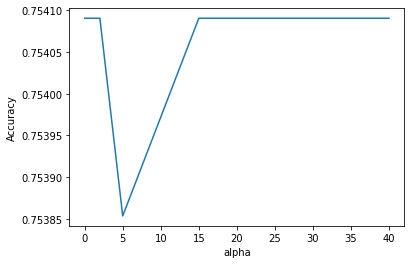

In [111]:
sns.lineplot(x = 'alpha', y = 'Accuracy', data = df_results )

We find most accuracies are  0.754091. Since it is worse than prvieous models we will not choose this NB as our method

# Model 3 Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import *

df_results = pd.DataFrame(columns = ['penaty','weight','pipe','Accuracy', 'Sensitivity','Specificty' ,'F1 Score', 'Roc_Auc'])
penalties =  ['l2',  'none']
weights = ['dict','balanced']
count = 0


for penalty in penalties:
    for weight in weights:
        pipe_log = Pipeline (steps = [ ('model',LogisticRegression(penalty = penalty, class_weight = weight))])
        pipe_log_pca = Pipeline (steps = [ ('pca',PCA(0.9)), ('model',LogisticRegression(penalty = penalty, class_weight = weight))])
        pipe_list = [pipe_log, pipe_log_pca]
        pipe_num = 0 
        for pipe in pipe_list:
            model = pipe.fit(X_train, y_train) 
            y_pred = model.predict(X_val)
            tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
            accuracy = (tp+tn)/(tn+fp+fn+tp)
            sensitivity = (tp)/(fn+tp)
            specificty = (tn)/(fp+tn)
            f1 = f1_score(y_val, y_pred)
            auc = roc_auc_score(y_val, y_pred)
            df_results.loc[count] = [penalty , weight, pipe_num,accuracy,sensitivity,specificty,f1,auc]
            pipe_num = pipe_num + 1
            count = count + 1

     

print(df_results)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


  penaty    weight pipe  Accuracy  Sensitivity  Specificty  F1 Score   Roc_Auc
0     l2      dict    0  0.754091     0.221902    0.928526  0.308205  0.575214
1     l2      dict    1  0.753142     0.000000    1.000000  0.000000  0.500000
2     l2  balanced    0  0.663742     0.720461    0.645151  0.514051  0.682806
3     l2  balanced    1  0.501067     0.546590    0.486146  0.351018  0.516368
4   none      dict    0  0.754802     0.225744    0.928212  0.312500  0.576978
5   none      dict    1  0.753142     0.000000    1.000000  0.000000  0.500000
6   none  balanced    0  0.676073     0.736792    0.656171  0.528966  0.696481
7   none  balanced    1  0.501067     0.546590    0.486146  0.351018  0.516368


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


We find column 4 has highest accuracy 0.753142(none penaty and dict, no PCA) But the score is not good as other models so we will not consider logistic regression

# Model 4  Random Forest(Decision Tree)

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import *

df_results = pd.DataFrame(columns = ['max_depth','n_estimator','Accuracy', 'Sensitivity','Specificty' ,'F1 Score', 'Roc_Auc'])
depths  =  [10,20,30]
n_estimators =   [10, 20 ,30 ,40 ,50 ,60]
count = 0


for depth in depths:
    for n in n_estimators:
        pipe = Pipeline (steps = [ ('model',RandomForestClassifier(max_depth = depth, n_estimators = n,random_state= 9))])
        model = pipe.fit(X_train, y_train) 
        y_pred = model.predict(X_val)
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
        accuracy = (tp+tn)/(tn+fp+fn+tp)
        sensitivity = (tp)/(fn+tp)
        specificty = (tn)/(fp+tn)
        f1 = f1_score(y_val, y_pred)
        auc = roc_auc_score(y_val, y_pred)
        df_results.loc[count] = [depth , n, accuracy,sensitivity,specificty,f1,auc]
        count = count + 1
       

In [118]:
from tabulate import tabulate
print(tabulate(df_results, headers=df_results.columns, tablefmt='grid'))

print('Best performing model')      
print(tabulate(df_results[df_results['Accuracy']==df_results['Accuracy'].max()], headers = 'keys', tablefmt = 'psql'))

+----+-------------+---------------+------------+---------------+--------------+------------+-----------+
|    |   max_depth |   n_estimator |   Accuracy |   Sensitivity |   Specificty |   F1 Score |   Roc_Auc |
+====+=============+===============+============+===============+==============+============+===========+
|  0 |          10 |            10 |   0.852739 |      0.532181 |     0.957809 |   0.640833 |  0.744995 |
+----+-------------+---------------+------------+---------------+--------------+------------+-----------+
|  1 |          10 |            20 |   0.851079 |      0.53122  |     0.955919 |   0.637832 |  0.74357  |
+----+-------------+---------------+------------+---------------+--------------+------------+-----------+
|  2 |          10 |            30 |   0.852265 |      0.533141 |     0.956864 |   0.640508 |  0.745003 |
+----+-------------+---------------+------------+---------------+--------------+------------+-----------+
|  3 |          10 |            40 |   0.84918

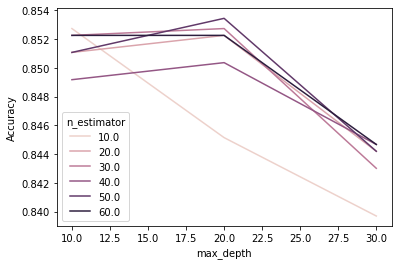

In [119]:
sns.lineplot(x = 'max_depth', y = 'Accuracy',  hue = 'n_estimator', data = df_results )

We find that max_depth = 10 and n_estimators = 50 has highest accuracy, 0.85345. It is also our current best model


# Model 5 neural network

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import *
from sklearn.neural_network import MLPClassifier

df_results = pd.DataFrame(columns = ['leaning_rate','transfer_function','Accuracy', 'Sensitivity','Specificty' ,'F1 Score', 'Roc_Auc'])
lrs = [0.00001, 0.0001, 0.001, 0.003, 0.01, 0.03, 1, 3, 10]
transfer_functions = ['identity', 'logistic', 'tanh', 'relu']
count = 0
for lr in lrs:
  for tf in transfer_functions:
      pipe = Pipeline (steps = [('Scaler', StandardScaler()), ('model',MLPClassifier(learning_rate_init= lr, activation=tf))])
      model = pipe.fit(X_train, y_train) 
      y_pred = model.predict(X_val)
      tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
      accuracy = (tp+tn)/(tn+fp+fn+tp)
      sensitivity = (tp)/(fn+tp)
      specificty = (tn)/(fp+tn)
      f1 = f1_score(y_val, y_pred)
      auc = roc_auc_score(y_val, y_pred)
      df_results.loc[count] = [lr,tf,accuracy,sensitivity,specificty,f1,auc]
      count = count + 1




 



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from tabulate import tabulate
print(tabulate(df_results, headers=df_results.columns, tablefmt='grid'))

print('Best performing model')      
print(tabulate(df_results[df_results['Accuracy']==df_results['Accuracy'].max()], headers = 'keys', tablefmt = 'psql'))

+----+----------------+---------------------+------------+---------------+--------------+------------+-----------+
|    |   leaning_rate | transfer_function   |   Accuracy |   Sensitivity |   Specificty |   F1 Score |   Roc_Auc |
+====+================+=====================+============+===============+==============+============+===========+
|  0 |         1e-05  | identity            |   0.807446 |    0.427474   |    0.93199   | 0.522914   |  0.679732 |
+----+----------------+---------------------+------------+---------------+--------------+------------+-----------+
|  1 |         1e-05  | logistic            |   0.789424 |    0.210375   |    0.979219  | 0.330317   |  0.594797 |
+----+----------------+---------------------+------------+---------------+--------------+------------+-----------+
|  2 |         1e-05  | tanh                |   0.80958  |    0.441883   |    0.930101  | 0.533952   |  0.685992 |
+----+----------------+---------------------+------------+---------------+------

The result is also very good. We will choose both Random Forest and netural network as our best model. Best parameters: learning rate = 0.001 and logistic is transfer function  

# Prdiction On Test DataSet

In [122]:

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.neural_network import MLPClassifier
df_results = pd.DataFrame(columns = ['leaning_rate','transfer_function','Accuracy', 'Sensitivity','Specificty' ,'F1 Score', 'Roc_Auc'])

pipe = Pipeline (steps = [('Scaler', StandardScaler()), ('model',MLPClassifier(learning_rate_init= 0.001, activation= 'logistic', max_iter= 1000))])

model = pipe.fit(X_train, y_train) 
y_pred = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp+tn)/(tn+fp+fn+tp)
sensitivity = (tp)/(fn+tp)
specificty = (tn)/(fp+tn)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
df_results.loc[0] = [0.001,'logistic',accuracy,sensitivity,specificty,f1,auc]

print(tabulate(df_results, headers=df_results.columns, tablefmt='grid'))

+----+----------------+---------------------+------------+---------------+--------------+------------+-----------+
|    |   leaning_rate | transfer_function   |   Accuracy |   Sensitivity |   Specificty |   F1 Score |   Roc_Auc |
+====+================+=====================+============+===============+==============+============+===========+
|  0 |          0.001 | logistic            |   0.846537 |      0.624752 |     0.916407 |   0.661079 |   0.77058 |
+----+----------------+---------------------+------------+---------------+--------------+------------+-----------+


In [124]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier

df_results = pd.DataFrame(columns = ['max_depth','n_estimator','Accuracy', 'Sensitivity','Specificty' ,'F1 Score', 'Roc_Auc'])
pipe = Pipeline (steps = [ ('model',RandomForestClassifier(max_depth = 10, n_estimators = 50, random_state= 9))])
model = pipe.fit(X_train, y_train) 
y_pred = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp+tn)/(tn+fp+fn+tp)
sensitivity = (tp)/(fn+tp)
specificty = (tn)/(fp+tn)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
df_results.loc[count] = [10 , 50, accuracy,sensitivity,specificty,f1,auc]

print(tabulate(df_results, headers=df_results.columns, tablefmt='grid'))


+----+-------------+---------------+------------+---------------+--------------+------------+-----------+
|    |   max_depth |   n_estimator |   Accuracy |   Sensitivity |   Specificty |   F1 Score |   Roc_Auc |
+====+=============+===============+============+===============+==============+============+===========+
| 18 |          10 |            50 |   0.858634 |      0.550495 |     0.955708 |   0.651054 |  0.753102 |
+----+-------------+---------------+------------+---------------+--------------+------------+-----------+


Both still reach very good results. RandomForest has a little bittle higher accuracy 0.858634 . We now will choose Random Forest as our best model

# Further Explore

Select Predictors

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import pandas as pd
from tabulate import tabulate

df_results = pd.DataFrame(columns = ['num_of_predictors','Accuracy', 'Sensitivity','Specificty' ,'F1 Score', 'Roc_Auc'])


for i in range(1,12):
  selection = SelectKBest(score_func=f_classif, k=i).fit(X_train,y_train)
  new_X_train = selection.transform(X_train)
  new_X_val = selection.transform(X_val)
  pipe = Pipeline (steps = [ ('model',RandomForestClassifier(max_depth = 10, n_estimators = 50, random_state= 9))])
  model = pipe.fit(new_X_train, y_train) 
  y_pred = model.predict(new_X_val)
  tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
  accuracy = (tp+tn)/(tn+fp+fn+tp)
  sensitivity = (tp)/(fn+tp)
  specificty = (tn)/(fp+tn)
  f1 = f1_score(y_val, y_pred)
  auc = roc_auc_score(y_val, y_pred)
  df_results.loc[i] = [i, accuracy,sensitivity,specificty,f1,auc]

print(tabulate(df_results, headers=df_results.columns, tablefmt='grid'))
print('Best performing model')      
print(tabulate(df_results[df_results['Accuracy']==df_results['Accuracy'].max()], headers = 'keys', tablefmt = 'psql'))

+----+---------------------+------------+---------------+--------------+------------+-----------+
|    |   num_of_predictors |   Accuracy |   Sensitivity |   Specificty |   F1 Score |   Roc_Auc |
+====+=====================+============+===============+==============+============+===========+
|  1 |                   1 |   0.775907 |      0.21806  |     0.958753 |   0.324518 |  0.588406 |
+----+---------------------+------------+---------------+--------------+------------+-----------+
|  2 |                   2 |   0.783495 |      0.320845 |     0.935139 |   0.422517 |  0.627992 |
+----+---------------------+------------+---------------+--------------+------------+-----------+
|  3 |                   3 |   0.830922 |      0.459174 |     0.952771 |   0.572798 |  0.705972 |
+----+---------------------+------------+---------------+--------------+------------+-----------+
|  4 |                   4 |   0.832582 |      0.481268 |     0.947733 |   0.586651 |  0.714501 |
+----+--------------

Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score
import numpy as np

df_results = pd.DataFrame(columns = ['K-Fold','Accuracy'])
for i in range(2,11):
  selection = SelectKBest(score_func=f_classif, k=i).fit(X_train,y_train)
  new_X_train = selection.transform(X_train)
  new_X_val = selection.transform(X_val)
  pipe = Pipeline (steps = [ ('model',RandomForestClassifier(max_depth = 10, n_estimators = 50, random_state= 9))])
  scores = cross_val_score(pipe, features, target, cv=i)
  accuracy = np.mean(scores)
  df_results.loc[i] = [i, accuracy]

print(tabulate(df_results, headers=df_results.columns, tablefmt='grid'))
print('Best performing model')      
print(tabulate(df_results[df_results['Accuracy']==df_results['Accuracy'].max()], headers = 'keys', tablefmt = 'psql'))

+----+----------+------------+
|    |   K-Fold |   Accuracy |
+====+==========+============+
|  2 |        2 |   0.850387 |
+----+----------+------------+
|  3 |        3 |   0.850814 |
+----+----------+------------+
|  4 |        4 |   0.85181  |
+----+----------+------------+
|  5 |        5 |   0.852142 |
+----+----------+------------+
|  6 |        6 |   0.852047 |
+----+----------+------------+
|  7 |        7 |   0.852332 |
+----+----------+------------+
|  8 |        8 |   0.851288 |
+----+----------+------------+
|  9 |        9 |   0.852712 |
+----+----------+------------+
| 10 |       10 |   0.851905 |
+----+----------+------------+
Best performing model
+----+----------+------------+
|    |   K-Fold |   Accuracy |
|----+----------+------------|
|  9 |        9 |   0.852712 |
+----+----------+------------+


 Now we have accuracy of 0.852712 by using 9 fold and 9 predictors with random forest methods(depth =10, n_estimator = 50). It is good but it has not been improved a lot. 

# Best Performence

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier

df_results = pd.DataFrame(columns = ['max_depth','n_estimator','Accuracy', 'Sensitivity','Specificty' ,'F1 Score', 'Roc_Auc'])
pipe = Pipeline (steps = [ ('model',RandomForestClassifier(max_depth = 10, n_estimators = 50, random_state= 9))])
model = pipe.fit(X_train, y_train) 
y_pred = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp+tn)/(tn+fp+fn+tp)
sensitivity = (tp)/(fn+tp)
specificty = (tn)/(fp+tn)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
df_results.loc[count] = [10 , 50, accuracy,sensitivity,specificty,f1,auc]

print(tabulate(df_results, headers=df_results.columns, tablefmt='grid'))


+----+-------------+---------------+------------+---------------+--------------+------------+-----------+
|    |   max_depth |   n_estimator |   Accuracy |   Sensitivity |   Specificty |   F1 Score |   Roc_Auc |
+====+=============+===============+============+===============+==============+============+===========+
| 18 |          10 |            50 |   0.858634 |      0.550495 |     0.955708 |   0.651054 |  0.753102 |
+----+-------------+---------------+------------+---------------+--------------+------------+-----------+


 random forest methods(depth =10, n_estimator = 50).  Accuracy:  0.858634